
## Кластеризация исполнителей по жанрам

В этом задании попробуем кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [ ]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [ ]:
ratings = ratings.T

In [ ]:

ratings = ratings.drop('user')
ratings.shape

(1000, 5000)

Заполним пропуски нулями.

In [ ]:
ratings.fillna(0, inplace=True)

Нормализуем данные при помощи `normalize`.

In [ ]:
from sklearn.preprocessing import normalize


data_normalized = normalize(ratings, axis=1)


Применим KMeans с 5ю кластерами на преобразованной матрице.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data_normalized)

clusters = kmeans.predict(data_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:

centroids = kmeans.cluster_centers_
print("Центроиды кластеров:\n", centroids)

Центроиды кластеров:
 [[ 6.40741721e-04  2.36447564e-03  4.29016575e-03 ...  7.62038845e-06
   1.28011169e-03  6.39496846e-03]
 [ 2.07567706e-03  1.44292435e-03  7.80382994e-04 ...  3.87776121e-03
   1.49866306e-03  1.00715797e-03]
 [ 1.19227588e-03  1.30104261e-18  1.54516736e-04 ... -1.51788304e-18
   0.00000000e+00 -1.30104261e-18]
 [ 2.19385056e-03  1.95156391e-18  5.10103893e-04 ...  1.00956023e-03
   0.00000000e+00  1.05051410e-03]
 [ 5.98340258e-04  8.73529826e-04  1.25054398e-03 ...  1.33055952e-04
   3.64411324e-03  3.58850280e-04]]


Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).



In [ ]:
from scipy.spatial import distance



* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [ ]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

In [ ]:
for cluster_num in range(5):
    points_in_cluster = data_normalized[clusters == cluster_num]
    top_10_indices = pClosest(points_in_cluster, centroids[cluster_num])
    print(f"\nТоп-10 исполнителей для кластера {cluster_num}:")
    print(ratings.index[top_10_indices])

beatles_vec = ratings.loc['the beatles'].values
coldplay_vec = ratings.loc['coldplay'].values
cosine_distance = distance.cosine(beatles_vec, coldplay_vec)
print(f"\nКосинусное расстояние между 'The Beatles' и 'Coldplay': {round(cosine_distance, 2)}")


Топ-10 исполнителей для кластера 0:
Index(['pink fluid', 'the beatles', 'elliotte smith', 'belle and sebastian',
       'coldplay', 'sufjan stevens', 'the killers', 'the arcade fire', 'muse',
       'johnny clash'],
      dtype='object')

Топ-10 исполнителей для кластера 1:
Index(['the beatles', 'radiohead', 'niИ', 'sufjan stevens', 'coldplay',
       'deathcab for cutie', 'daft punk', 'the pixies', 'kanye west',
       'modest mouse'],
      dtype='object')

Топ-10 исполнителей для кластера 2:
Index(['sufjan stevens', 'deathcab for cutie', 'red hot clili peppers',
       'pink fluid', 'the beatles', '‌linkin park', 'dylan. bob',
       'björk guğmunsdóttir', 'metallica', 'bright eyes'],
      dtype='object')

Топ-10 исполнителей для кластера 3:
Index(['deathcab for cutie', 'sufjan stevens', 'white stripes', 'johnson jack',
       'kanye west', 'nirvana', 'led zeppelin.', 'bright eyes',
       'kings of leon', 'the rolling stones'],
      dtype='object')

Топ-10 исполнителей для класт

## Сравнение алгоритмов кластеризации

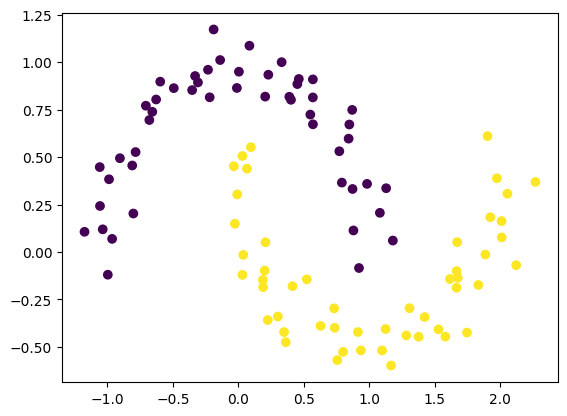

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Попробуем найти кластеры при помощи KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


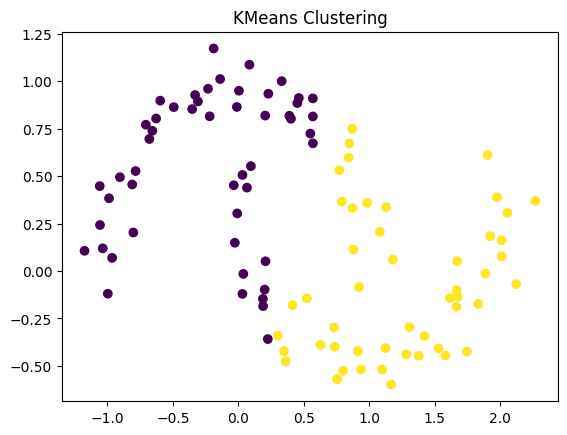

In [ ]:
# ваш код здесь
from sklearn.cluster import KMeans

# Применение KMeans для 2 кластеров
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Визуализация кластеров, найденных KMeans
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering')
plt.show()


Подберём $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

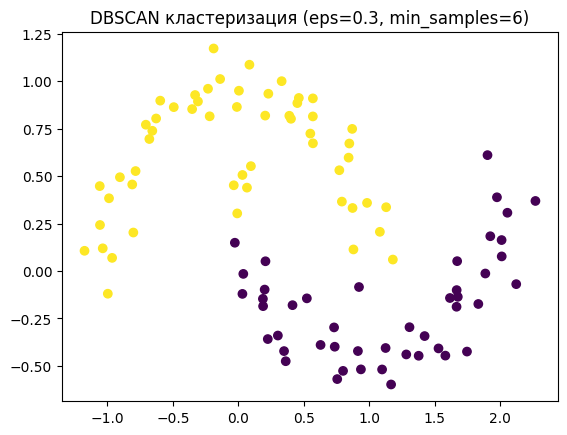

Лучшие параметры DBSCAN: eps=0.3, min_samples=6, silhouette score=0.3841126470696556


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
min_samples_values = [4, 5, 6, 7]

best_eps = None
best_min_samples = None
best_score = -1

# Подбор параметров eps и min_samples для DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)

        # Игнорируем случаи, когда все метки -1 (шум)
        if len(set(dbscan_labels)) > 1:
            score = silhouette_score(X, dbscan_labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Применение DBSCAN с лучшими параметрами
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels_best = dbscan_best.fit_predict(X)

# Визуализация кластеров, найденных DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels_best)
plt.title(f'DBSCAN кластеризация (eps={best_eps}, min_samples={best_min_samples})')
plt.show()

print(f'Лучшие параметры DBSCAN: eps={best_eps}, min_samples={best_min_samples}, silhouette score={best_score}')


Используем иерархическую кластеризацию для поиска кластеров.
Зададим в методе 2 кластера. Подберём гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

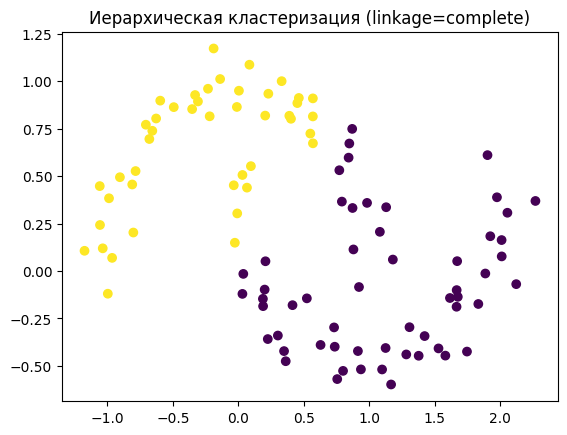

Лучший метод linkage для иерархической кластеризации: complete, silhouette score=0.4676584228146433


In [ ]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['ward', 'complete', 'average', 'single']

best_linkage = None
best_score = -1

# Подбор лучшего метода связи (linkage)
for linkage in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hierarchical_labels = hierarchical.fit_predict(X)

    score = silhouette_score(X, hierarchical_labels)
    if score > best_score:
        best_score = score
        best_linkage = linkage

# Применение иерархической кластеризации с лучшим методом
hierarchical_best = AgglomerativeClustering(n_clusters=2, linkage=best_linkage)
hierarchical_labels_best = hierarchical_best.fit_predict(X)

# Визуализация кластеров, найденных иерархической кластеризацией
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels_best)
plt.title(f'Иерархическая кластеризация (linkage={best_linkage})')
plt.show()

print(f'Лучший метод linkage для иерархической кластеризации: {best_linkage}, silhouette score={best_score}')



Попробуем найти кластеры при помощи спектральной кластеризации.
Зададим 2 кластера, affinity='nearest_neighbors', random_state=42. Подберём гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


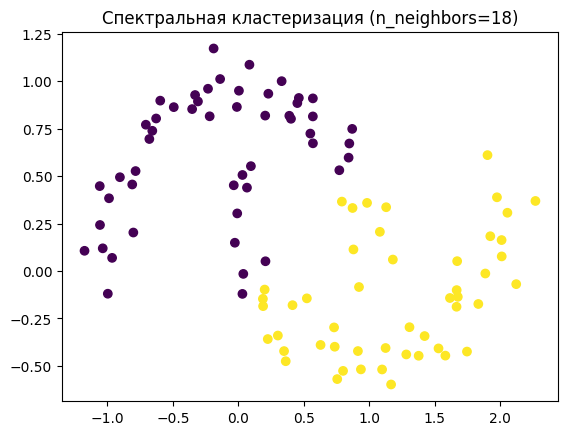

Лучший n_neighbors для спектральной кластеризации: 18, silhouette score=0.46673560492130245


In [ ]:
from sklearn.cluster import SpectralClustering

best_n_neighbors = None
best_score = -1

# Подбор наилучшего n_neighbors для Spectral Clustering
for n_neighbors in range(1, 20):
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=n_neighbors, random_state=42)
    spectral_labels = spectral.fit_predict(X)

    score = silhouette_score(X, spectral_labels)
    if score > best_score:
        best_score = score
        best_n_neighbors = n_neighbors

# Применение спектральной кластеризации с лучшими параметрами
spectral_best = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=best_n_neighbors, random_state=42)
spectral_labels_best = spectral_best.fit_predict(X)

# Визуализация кластеров, найденных спектральной кластеризацией
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels_best)
plt.title(f'Спектральная кластеризация (n_neighbors={best_n_neighbors})')
plt.show()

print(f'Лучший n_neighbors для спектральной кластеризации: {best_n_neighbors}, silhouette score={best_score}')


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


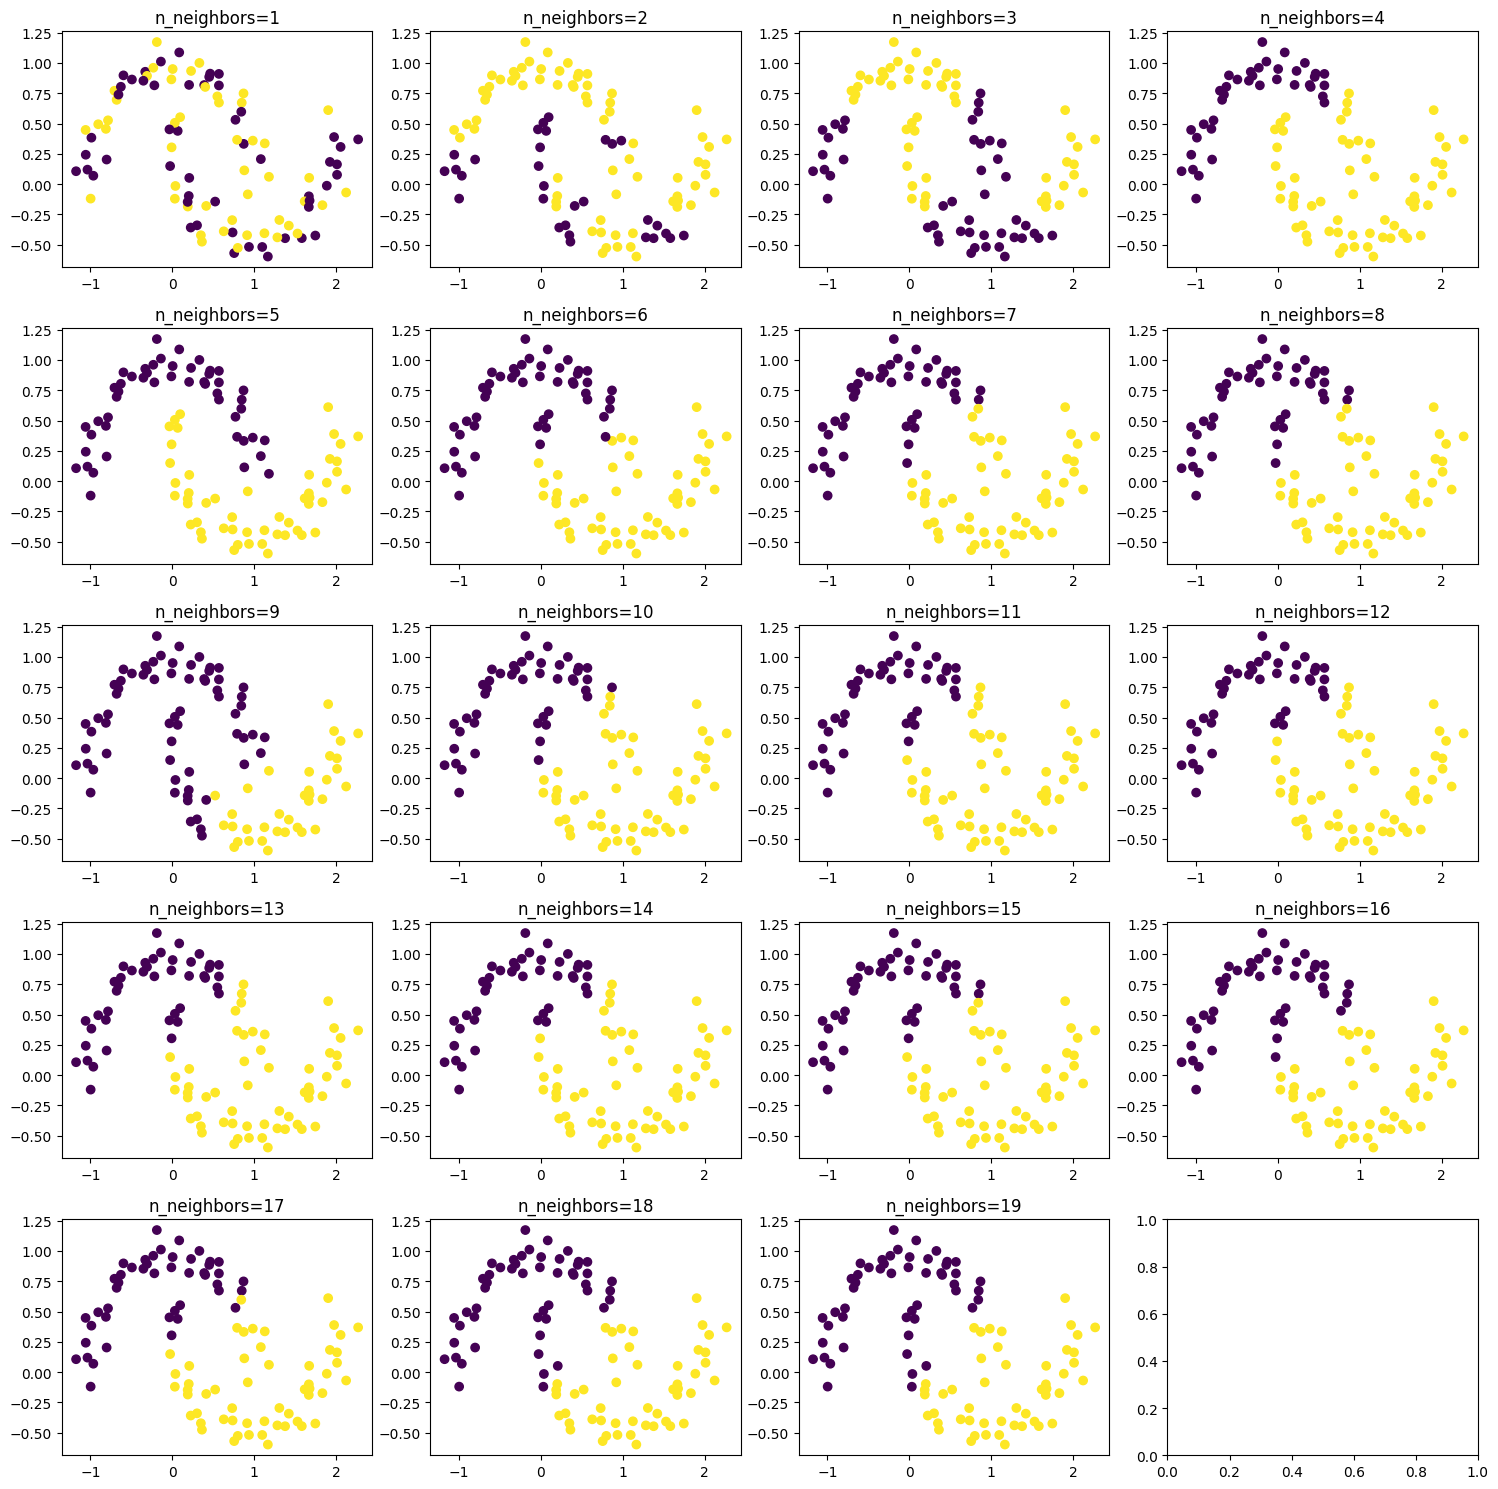

In [ ]:
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot as plt

# Устанавливаем размер сетки для графиков
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
axes = axes.flatten()

# Пробегаем по каждому n_neighbors от 1 до 19
for i, n_neighbors in enumerate(range(1, 20)):
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=n_neighbors, random_state=42)
    spectral_labels = spectral.fit_predict(X)

    # Отрисовываем график для текущего n_neighbors
    axes[i].scatter(X[:, 0], X[:, 1], c=spectral_labels)
    axes[i].set_title(f'n_neighbors={n_neighbors}')


# Показываем графики
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Данные
x = np.array([1, 2, 3, 4])
y = np.array([6, 6, 12, 18])

# Лямбда для регуляризации
lambda_reg = 1

# Дерево 1 (предикат: x > 2.5)
# Левый лист: объекты 1, 2
# Правый лист: объекты 3, 4

L1 = [0, 1]  # Индексы для левого листа
R1 = [2, 3]  # Индексы для правого листа

l1 = (np.sum(y[L1]) / len(L1)) / (1 + lambda_reg)
r1 = (np.sum(y[R1]) / len(R1)) / (1 + lambda_reg)

# Дерево 2 (предикат: x > 3.5)
# Левый лист: объекты 1, 2, 3
# Правый лист: объект 4

L2 = [0, 1, 2]  # Индексы для левого листа
R2 = [3]        # Индексы для правого листа

l2 = (np.sum(y[L2]) / len(L2)) / (1 + lambda_reg)
r2 = y[R2[0]] / (1 + lambda_reg)

# Прогноз для x = 1 (попадает в левый лист в обоих деревьях)
boosting_prediction = l1 + l2

print(f"Прогноз для x = 1: {boosting_prediction}")


Прогноз для x = 1: 7.0
